In [ ]:


#%% [code]
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline
df = pd.read_csv('/content/lockdown_tweets #lockdown (31-2).csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df.head()

,Unnamed: 0,username,description,location,date,following,followers,totaltweets,retweetcount,text,hashtags
0,0,chipmcdonald,"Guitar teacher, musician, photographer, writer...","Augusta, GA",01-01-2022 23:55,998,1047,32321,0,Again - you may be a sociopath if you not only...,"['lockdown', 'Covid_19', 'LongCovidKids']"
1,1,dinamalarweb,"https://t.co/Jax7cEBSuN is the No.1, Tamil New...","39, Whites road, Chennai",01-01-2022 23:52,160,835311,724345,2,🔴Live : 02 January 2022 | செய்திகள் நேரலை | Di...,"['Stalin', 'CM', 'Tamilnadu', 'NightCurfew', '..."
2,2,Lee67221014,NaN,NaN,01-01-2022 23:52,451,176,3582,0,Lockdown News Roundup NEW YEAR GONGS / Hugo Ta...,['lockdown']
3,3,moirarichards14,NaN,"Nottingham, England",01-01-2022 23:32,192,241,5972,0,Iron Mountain 1966 Report Leaked Everything Ha...,"['UN', 'lockdown']"
4,4,oralvaultradio,Lifestyle Radio| Poetry | Talk| Sports| Music ...,NaN,01-01-2022 23:30,88,143,35768,1,Now playing on : The Breeze (Cool) (Feat. Wiz ...,"['oralvaultradio', 'lockdown', 'keepiton']"


In [ ]:
df[df.duplicated()]
df.drop_duplicates(keep=False,inplace=True)
df.shape

(380, 11)

In [ ]:
df['location'].value_counts()


USA                        13
Ontario, Canada            12
India                      11
United Kingdom              7
Mumbai, India               5
                           ..
Gurugram , Haryana          1
Navi Mumbai, India          1
The Milky Way               1
Jamshedpur, India           1
Cotswolds & SW France.      1
Name: location, Length: 172, dtype: int64

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 3.9 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=d2bb2253c9480161a7053eefec03d442cf4191afb6e6fcb967ec6104461e3cb1
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
import pycountry
countries_list = []
for i in list(pycountry.countries):
    countries_list.append(i.name)
countries = []
for c1 in df.location.values:
    if type(c1) != str:
        countries.append(np.nan)
    else:
        cnt=0 ##counter to check if we arrived at the end of the country list
        for c2 in countries_list:
            if c2 in c1:
                countries.append(c2)
                break
            else:
                cnt+=1
                if cnt== len(countries_list):
                    countries.append(np.nan)
df['country'] = countries
df['country'].value_counts()

India             37
Canada            17
United Kingdom    10
Ireland            4
Pakistan           3
Australia          3
Bangladesh         2
Netherlands        2
South Africa       2
Mexico             1
Greece             1
Hong Kong          1
Uganda             1
Bulgaria           1
France             1
Italy              1
Name: country, dtype: int64

In [ ]:
!pip install demoji
!pip install emoji

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    text = text.replace('\r','').replace('\n',' ').replace('\n',' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+","",text) #remove links and mentions
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['text'].apply(lambda x:remove_punctuation(x))
df.clean_msg.head(18)



0     again  you may be a sociopath if you not only ...
1     🔴live  02 january 2022  செய்திகள் நேரலை  dinam...
2     lockdown news roundup new year gongs  hugo tal...
3     iron mountain 1966 report leaked everything ha...
4     now playing on  the breeze cool feat wiz khali...
5      our local powerplayer dropped out lockdown  i...
6     now playing on  brown eyes 2001 by 125 destiny...
7     crochet hot water bottle and cushion cover set...
8     💥i have a friend that works in the vic medical...
9     massformationpsychosis  sccounty md sara cody ...
10    spongebob tried to warn us about the cdc ‘s re...
11     hope everyone enjoyed their christmas and new...
12    now playing on  man must wack by dr barz tune ...
13     with these numbers testing is insufficient in...
14    austria to again extend segregation lockdown f...
15    sorry not enough hashtags covid nameandshame c...
16    do we think school’s will be returning this we...
17                     lockdown coming january8t

In [ ]:
import demoji
import emoji

for tweet in df['clean_msg']:
  tweet = emoji.demojize(tweet)
  tweet = tweet.replace(":"," ")
  tweet = ' '.join(tweet.split())
df 

,Unnamed: 0,username,description,location,date,following,followers,totaltweets,retweetcount,text,hashtags,country,clean_msg,msg_tokenied,msg_lemmatized,sentiment_nltk,sentiment_blob,sentiment_blob_polarity,sentiment_blob_subjectivity,sentiment_vader
0,0,chipmcdonald,"Guitar teacher, musician, photographer, writer...","Augusta, GA",01-01-2022 23:55,998,1047,32321,0,Again - you may be a sociopath if you not only...,"['lockdown', 'Covid_19', 'LongCovidKids']",NaN,again you may be a sociopath if you not only ...,"[[again, you, may, be, a, sociopath, if, you, ...",may sociopath dont mind kid get long covid act...,neu,neu,0.083333,0.557778,pos
1,1,dinamalarweb,"https://t.co/Jax7cEBSuN is the No.1, Tamil New...","39, Whites road, Chennai",01-01-2022 23:52,160,835311,724345,2,🔴Live : 02 January 2022 | செய்திகள் நேரலை | Di...,"['Stalin', 'CM', 'Tamilnadu', 'NightCurfew', '...",NaN,🔴live 02 january 2022 செய்திகள் நேரலை dinam...,"[[🔴live, 02, january, 2022, செய்திகள், நேரலை, ...",🔴live 02 january 2022 செய்திகள் நேரலை dinamala...,neu,pos,0.136364,0.477273,neu
2,2,Lee67221014,NaN,NaN,01-01-2022 23:52,451,176,3582,0,Lockdown News Roundup NEW YEAR GONGS / Hugo Ta...,['lockdown'],NaN,lockdown news roundup new year gongs hugo tal...,"[[lockdown, news, roundup, new, year, gongs, h...",lockdown news roundup new year gong hugo talk ...,neu,pos,0.136364,0.454545,neu
3,3,moirarichards14,NaN,"Nottingham, England",01-01-2022 23:32,192,241,5972,0,Iron Mountain 1966 Report Leaked Everything Ha...,"['UN', 'lockdown']",NaN,iron mountain 1966 report leaked everything ha...,"[[iron, mountain, 1966, report, leaked, everyt...",iron mountain 1966 report leak everything happ...,neu,neu,0.000000,0.000000,neg
4,4,oralvaultradio,Lifestyle Radio| Poetry | Talk| Sports| Music ...,NaN,01-01-2022 23:30,88,143,35768,1,Now playing on : The Breeze (Cool) (Feat. Wiz ...,"['oralvaultradio', 'lockdown', 'keepiton']",NaN,now playing on the breeze cool feat wiz khali...,"[[now, playing, on, the, breeze, cool, feat, w...",play breeze cool feat wiz khalifa wale tune 👇 ...,neu,pos,0.350000,0.650000,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,Melissa19470513,Experienced homelessness with health issues. ...,NaN,01-01-2022 07:55,367,64,3806,0,@maolesen South Africa is on Level 1 #lockdown...,"['lockdown', 'lockdown']",NaN,south africa is on level 1 lockdown and they ...,"[[south, africa, is, on, level, 1, lockdown, a...",south africa level 1 lockdown lockdown 600 day,neu,neu,0.000000,0.000000,neu
376,376,5thmetertarsal,Bricks & cement,london,01-01-2022 07:53,449,118,1922,0,Celebrating January. Load of bollocks #lockdow...,"['lockdown', 'HAPPYNEWYEAR2022']",NaN,celebrating january load of bollocks lockdown ...,"[[celebrating, january, load, of, bollocks, lo...",celebrate january load bollock lockdown happyn...,neu,neu,0.000000,0.000000,pos
377,377,LucindasIreland,Restaurant/Travel/Critic/Columnist/Journalist ...,Dublin & Kinsale,01-01-2022 07:49,4912,20742,65167,2,February 2021 - plating and photographing food...,"['lookback2021', 'February21', 'Lockdown', 'pa...",NaN,february 2021 plating and photographing food ...,"[[february, 2021, plating, and, photographing,...",february 2021 plat photograph food box standar...,neu,pos,0.500000,0.500000,pos
378,378,b4rbarian,The most important moments are the ones that m...,WORLD CITIZEN,01-01-2022 07:48,49,40,828,0,Dublin Ireland 🇮🇪 Grand Freemasonic Lodge gets...,"['folona', 'Ireland', 'USA', 'africa', 'Africa...",NaN,dublin ireland 🇮🇪 grand freemasonic lodge gets...,"[[dublin, ireland, 🇮🇪, grand, freemasonic, lod...",dublin ireland 🇮🇪 grand freemasonic lodge get ...,neu,pos,0.166667,0.333333,pos


In [ ]:
#converting to lowercase
df['clean_msg']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

,Unnamed: 0,username,description,location,date,following,followers,totaltweets,retweetcount,text,hashtags,country,clean_msg,msg_tokenied,msg_lemmatized,sentiment_nltk,sentiment_blob,sentiment_blob_polarity,sentiment_blob_subjectivity,sentiment_vader
0,0,chipmcdonald,"Guitar teacher, musician, photographer, writer...","Augusta, GA",01-01-2022 23:55,998,1047,32321,0,Again - you may be a sociopath if you not only...,"['lockdown', 'Covid_19', 'LongCovidKids']",NaN,again you may be a sociopath if you not only d...,"[[again, you, may, be, a, sociopath, if, you, ...",may sociopath dont mind kid get long covid act...,neu,neu,0.083333,0.557778,pos
1,1,dinamalarweb,"https://t.co/Jax7cEBSuN is the No.1, Tamil New...","39, Whites road, Chennai",01-01-2022 23:52,160,835311,724345,2,🔴Live : 02 January 2022 | செய்திகள் நேரலை | Di...,"['Stalin', 'CM', 'Tamilnadu', 'NightCurfew', '...",NaN,🔴live 02 january 2022 செய்திகள் நேரலை dinamala...,"[[🔴live, 02, january, 2022, செய்திகள், நேரலை, ...",🔴live 02 january 2022 செய்திகள் நேரலை dinamala...,neu,pos,0.136364,0.477273,neu
2,2,Lee67221014,NaN,NaN,01-01-2022 23:52,451,176,3582,0,Lockdown News Roundup NEW YEAR GONGS / Hugo Ta...,['lockdown'],NaN,lockdown news roundup new year gongs hugo talk...,"[[lockdown, news, roundup, new, year, gongs, h...",lockdown news roundup new year gong hugo talk ...,neu,pos,0.136364,0.454545,neu
3,3,moirarichards14,NaN,"Nottingham, England",01-01-2022 23:32,192,241,5972,0,Iron Mountain 1966 Report Leaked Everything Ha...,"['UN', 'lockdown']",NaN,iron mountain 1966 report leaked everything ha...,"[[iron, mountain, 1966, report, leaked, everyt...",iron mountain 1966 report leak everything happ...,neu,neu,0.000000,0.000000,neg
4,4,oralvaultradio,Lifestyle Radio| Poetry | Talk| Sports| Music ...,NaN,01-01-2022 23:30,88,143,35768,1,Now playing on : The Breeze (Cool) (Feat. Wiz ...,"['oralvaultradio', 'lockdown', 'keepiton']",NaN,now playing on the breeze cool feat wiz khalif...,"[[now, playing, on, the, breeze, cool, feat, w...",play breeze cool feat wiz khalifa wale tune 👇 ...,neu,pos,0.350000,0.650000,pos


In [ ]:
def tokenization(clean_msg):
    token_text = [nltk.word_tokenize(clean_msg)]
    return token_text
df['msg_tokenied']=df['clean_msg'].apply(lambda x:tokenization(x))
df.head()

,Unnamed: 0,username,description,location,date,following,followers,totaltweets,retweetcount,text,hashtags,country,clean_msg,msg_tokenied
0,0,chipmcdonald,"Guitar teacher, musician, photographer, writer...","Augusta, GA",01-01-2022 23:55,998,1047,32321,0,Again - you may be a sociopath if you not only...,"['lockdown', 'Covid_19', 'LongCovidKids']",NaN,again you may be a sociopath if you not only ...,"[[again, you, may, be, a, sociopath, if, you, ..."
1,1,dinamalarweb,"https://t.co/Jax7cEBSuN is the No.1, Tamil New...","39, Whites road, Chennai",01-01-2022 23:52,160,835311,724345,2,🔴Live : 02 January 2022 | செய்திகள் நேரலை | Di...,"['Stalin', 'CM', 'Tamilnadu', 'NightCurfew', '...",NaN,🔴live 02 january 2022 செய்திகள் நேரலை dinam...,"[[🔴live, 02, january, 2022, செய்திகள், நேரலை, ..."
2,2,Lee67221014,NaN,NaN,01-01-2022 23:52,451,176,3582,0,Lockdown News Roundup NEW YEAR GONGS / Hugo Ta...,['lockdown'],NaN,lockdown news roundup new year gongs hugo tal...,"[[lockdown, news, roundup, new, year, gongs, h..."
3,3,moirarichards14,NaN,"Nottingham, England",01-01-2022 23:32,192,241,5972,0,Iron Mountain 1966 Report Leaked Everything Ha...,"['UN', 'lockdown']",NaN,iron mountain 1966 report leaked everything ha...,"[[iron, mountain, 1966, report, leaked, everyt..."
4,4,oralvaultradio,Lifestyle Radio| Poetry | Talk| Sports| Music ...,NaN,01-01-2022 23:30,88,143,35768,1,Now playing on : The Breeze (Cool) (Feat. Wiz ...,"['oralvaultradio', 'lockdown', 'keepiton']",NaN,now playing on the breeze cool feat wiz khali...,"[[now, playing, on, the, breeze, cool, feat, w..."


In [ ]:
def remove_mult_spaces(clean_msg): ## remove multiple spaces
    return re.sub('\s\s+' ,' ',clean_msg)

df['clean_msg']=df['clean_msg'].apply(lambda x:remove_mult_spaces(x))
def remove_spam(clean_msg):
    match = re.search(r'subscribe',clean_msg)
    if match:
        return ''
    else:
        return clean_msg
nltk.download('averaged_perceptron_tagger')
df['clean_msg']=df['clean_msg'].apply(lambda x:remove_spam(x))

wordnet_lemmatizer=WordNetLemmatizer()

from nltk.corpus import wordnet
def get_wordnet_pos(word):
    '''Map POS tag to first character lemmatize() accepts'''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV}

    return tag_dict.get(tag,wordnet.NOUN)
df['msg_lemmatized'] = df['clean_msg'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in x.split() ]))
df.head(10)


from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

df['msg_lemmatized']= df['msg_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Unnamed: 0,username,description,location,date,following,followers,totaltweets,retweetcount,text,hashtags,country,clean_msg,msg_tokenied,msg_lemmatized
0,0,chipmcdonald,"Guitar teacher, musician, photographer, writer...","Augusta, GA",01-01-2022 23:55,998,1047,32321,0,Again - you may be a sociopath if you not only...,"['lockdown', 'Covid_19', 'LongCovidKids']",NaN,again you may be a sociopath if you not only d...,"[[again, you, may, be, a, sociopath, if, you, ...",may sociopath dont mind kid get long covid act...
1,1,dinamalarweb,"https://t.co/Jax7cEBSuN is the No.1, Tamil New...","39, Whites road, Chennai",01-01-2022 23:52,160,835311,724345,2,🔴Live : 02 January 2022 | செய்திகள் நேரலை | Di...,"['Stalin', 'CM', 'Tamilnadu', 'NightCurfew', '...",NaN,🔴live 02 january 2022 செய்திகள் நேரலை dinamala...,"[[🔴live, 02, january, 2022, செய்திகள், நேரலை, ...",🔴live 02 january 2022 செய்திகள் நேரலை dinamala...
2,2,Lee67221014,NaN,NaN,01-01-2022 23:52,451,176,3582,0,Lockdown News Roundup NEW YEAR GONGS / Hugo Ta...,['lockdown'],NaN,lockdown news roundup new year gongs hugo talk...,"[[lockdown, news, roundup, new, year, gongs, h...",lockdown news roundup new year gong hugo talk ...
3,3,moirarichards14,NaN,"Nottingham, England",01-01-2022 23:32,192,241,5972,0,Iron Mountain 1966 Report Leaked Everything Ha...,"['UN', 'lockdown']",NaN,iron mountain 1966 report leaked everything ha...,"[[iron, mountain, 1966, report, leaked, everyt...",iron mountain 1966 report leak everything happ...
4,4,oralvaultradio,Lifestyle Radio| Poetry | Talk| Sports| Music ...,NaN,01-01-2022 23:30,88,143,35768,1,Now playing on : The Breeze (Cool) (Feat. Wiz ...,"['oralvaultradio', 'lockdown', 'keepiton']",NaN,now playing on the breeze cool feat wiz khalif...,"[[now, playing, on, the, breeze, cool, feat, w...",play breeze cool feat wiz khalifa wale tune 👇 ...


In [ ]:
nltk.pos_tag(df.msg_lemmatized)

[('may sociopath dont mind kid get long covid actively push make sure school stay open online completely alienate lockdown covid19 longcovidkids',
  'NNS'),
 ('🔴live 02 january 2022 செய்திகள் நேரலை dinamalar live news night curfew new year 2022 stalin cm tamilnadu nightcurfew lockdown',
  'RP'),
 ('lockdown news roundup new year gong hugo talk lockdown via', 'JJ'),
 ('iron mountain 1966 report leak everything happen un hugo talk lockdown',
  'JJ'),
 ('play breeze cool feat wiz khalifa wale tune 👇 radio lifestyle 👮 oralvaultradio lockdown keepiton',
  'NN'),
 ('local powerplayer drop lockdown think might new scour rule build optimal pc player shade still fun doesnt always hit presstowin button try take mechanically good option',
  'NN'),
 ('play brown eye 2001 125 destiny child tune 👇 radio lifestyle 👮 oralvaultradio lockdown keepiton',
  'NN'),
 ('crochet hot water bottle cushion cover set crochet pattern instant download crochet hotwater cover cushion bottle set crochetpattern winter 

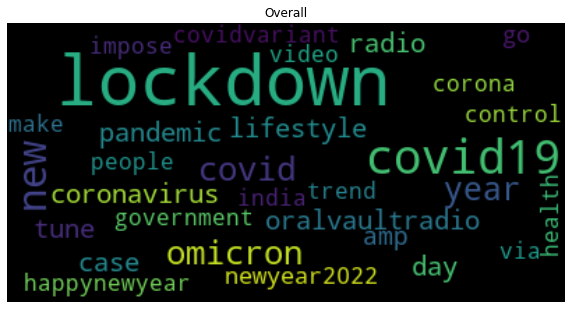

In [ ]:
#Importing Libraries
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize,word_tokenize
from wordcloud import WordCloud,STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor,max_words = 30, max_font_size = 50,collocations=False).generate(''.join(data))
    #wc.generate(''.join(data))
    plt.imshow(wc,interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

wc(df.msg_lemmatized,'black','Overall')

#from wordcloud import WordCloud
#Creating the text variable
#text2 = ' '.join(title for title in df.msg_lemmatized)
# Creating word_cloud with text as argument in .generate() method
#word_cloud2 = WordCloud(collocations = False,background_color = 'white').generate(text2)
# Display the generated Word Cloud
#plt.imshow(word_cloud2,interpolation='bilinear')
#plt.axis('off')
#plt.show()

In [ ]:

import nltk.sentiment
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk = SentimentIntensityAnalyzer()
sentiments_nltk = []
for tweet in df.msg_lemmatized:
    sentiment_dict = nltk.polarity_scores(tweet)
    sentiment_dict.pop('compound',None)
    sentiments_nltk.append(max(sentiment_dict ,key=sentiment_dict.get))
df['sentiment_nltk'] = sentiments_nltk
listnltk={}
listnltk=df['sentiment_nltk'].value_counts()
print(listnltk)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neu    365
pos     14
neg      1
Name: sentiment_nltk, dtype: int64


In [ ]:
#TEXTBLOB
!pip install TextBlob
from textblob import TextBlob
def polarity_to_text(blob):
    if (blob.sentiment.polarity > 0.1):
        return 'pos'
    elif(blob.sentiment.polarity <= 0.1 and  blob.sentiment.polarity >= -0.05):
        return 'neu'
    else:
        return 'neg'
sentiments_blob = []
sentiments_blob_polaritylist = []
sentiments_blob_subjectivitylist = []
for tweet in df.msg_lemmatized:
    blob = TextBlob(tweet)
    sentiments_blob.append(polarity_to_text(blob))
    sentiments_blob_polaritylist.append(blob.sentiment.polarity)
    sentiments_blob_subjectivitylist.append(blob.sentiment.subjectivity)
df['sentiment_blob'] = sentiments_blob
df['sentiment_blob_polarity']=sentiments_blob_polaritylist
df['sentiment_blob_subjectivity']=sentiments_blob_subjectivitylist
listblob={}
listblob=df['sentiment_blob'].value_counts()
print(df['sentiment_blob_polarity'])
print(df['sentiment_blob_subjectivity'])
print(listblob)


0      0.083333
1      0.136364
2      0.136364
3      0.000000
4      0.350000
         ...   
375    0.000000
376    0.000000
377    0.500000
378    0.166667
379    0.000000
Name: sentiment_blob_polarity, Length: 380, dtype: float64
0      0.557778
1      0.477273
2      0.454545
3      0.000000
4      0.650000
         ...   
375    0.000000
376    0.000000
377    0.500000
378    0.333333
379    0.000000
Name: sentiment_blob_subjectivity, Length: 380, dtype: float64
neu    212
pos    122
neg     46
Name: sentiment_blob, dtype: int64


In [ ]:
#VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()
sentiment_vader_table=[]
def dist(senti_vader):
	if (senti_vader['compound']>=0.05):
		return 'pos'
	elif (senti_vader['compound']<= -0.05):
		return 'neg'
	else:
		return 'neu'
for tweet in df.msg_lemmatized:
	senti_vader=(sentiment.polarity_scores(tweet))
	sentiment_vader_table.append(dist(senti_vader))
df['sentiment_vader'] = sentiment_vader_table
listvader={}
listvader=df['sentiment_vader'].value_counts()
print(listvader)


pos    175
neg    106
neu     99
Name: sentiment_vader, dtype: int64


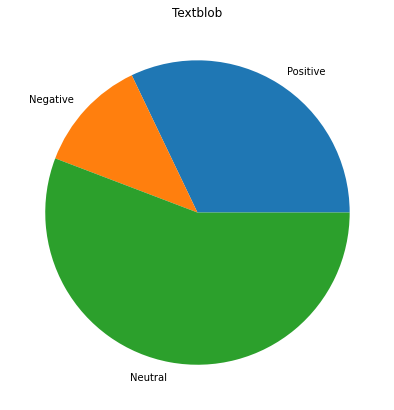

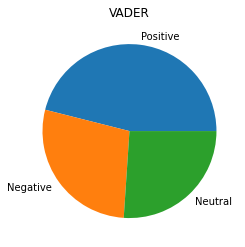

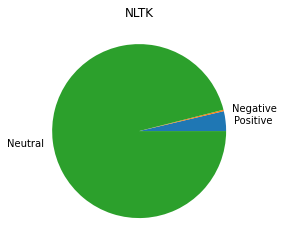

In [ ]:
# Create the pandas DataFrame
data = {'Textblob':[listblob['pos'],listblob['neg'],listblob['neu']],
        'VADER':[listvader['pos'],listvader['neg'],listvader['neu']],
        'NLTK':[listnltk['pos'],listnltk['neg'],listnltk['neu']]}
datasenti= pd.DataFrame(data,index = ['Positive','Negative','Neutral'],columns=['Textblob','VADER','NLTK'])

#data1=list(listvader.values)
#labels=list(listvader.keys())
#from matplotlib import pyplot as plt
#import numpy as np
# Creating plot
#fig = plt.figure(figsize =(10,7))
#plt.pie(data1,labels=labels)
#plt.title('VADER')
#plt.show()

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
# Creating plot
fig = plt.figure(figsize =(10,7))
for ty in data:
  plt.pie(data[ty],labels=datasenti.index)
  plt.title(ty)
  plt.show()




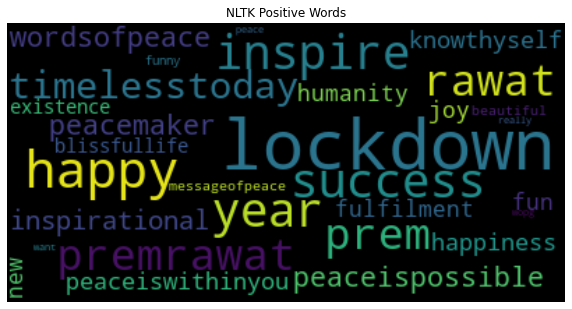

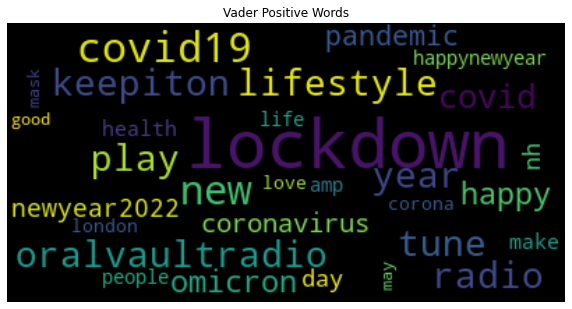

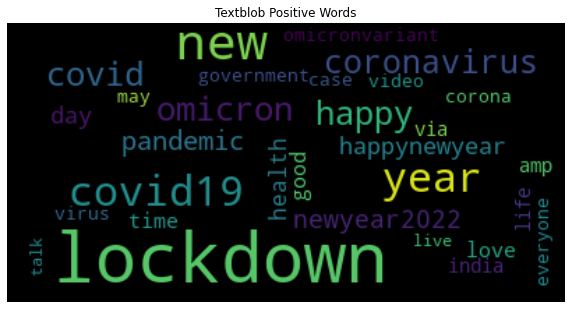

In [ ]:
#Wordclouds of 3 classifiers
texts_nltk_pos = ' '.join(sentiment for sentiment in df[df['sentiment_nltk']=='pos']['msg_lemmatized'])
texts_blob_pos = ' '.join(sentiment for sentiment in df[df['sentiment_blob']=='pos']['msg_lemmatized'])
texts_vader_pos = ' '.join(sentiment for sentiment in df[df['sentiment_vader']=='pos']['msg_lemmatized'])

wc(texts_nltk_pos,'black','NLTK Positive Words')
wc(texts_vader_pos,'black','Vader Positive Words')
wc(texts_blob_pos,'black','Textblob Positive Words')

In [ ]:
!pip install NRCLex
import nltk
nltk.download('punkt')
from nrclex import NRCLex


     |████████████████████████████████| 396 kB 5.1 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=f94747a81e6028f2b3939a2f6b44e84f371c46a387e35e7fe809f1e4292abdfa
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
emotion=NRCLex(','.join(df['msg_lemmatized']))
topemotions=emotion.top_emotions
print('Words',emotion.words)
print('Sentences',emotion.sentences)
print('Affect List',emotion.affect_list)
print('Affect Dictionary',emotion.affect_dict)
print('Raw emotion scores',emotion.raw_emotion_scores)
print('Top Emotions',emotion.top_emotions)
print('Frequency',emotion.affect_frequencies)



Words ['may', 'sociopath', 'dont', 'mind', 'kid', 'get', 'long', 'covid', 'actively', 'push', 'make', 'sure', 'school', 'stay', 'open', 'online', 'completely', 'alienate', 'lockdown', 'covid19', 'longcovidkids', '🔴live', '02', 'january', '2022', 'செய்திகள்', 'நேரலை', 'dinamalar', 'live', 'news', 'night', 'curfew', 'new', 'year', '2022', 'stalin', 'cm', 'tamilnadu', 'nightcurfew', 'lockdown', 'lockdown', 'news', 'roundup', 'new', 'year', 'gong', 'hugo', 'talk', 'lockdown', 'via', 'iron', 'mountain', '1966', 'report', 'leak', 'everything', 'happen', 'un', 'hugo', 'talk', 'lockdown', 'play', 'breeze', 'cool', 'feat', 'wiz', 'khalifa', 'wale', 'tune', '👇', 'radio', 'lifestyle', '👮', 'oralvaultradio', 'lockdown', 'keepiton', 'local', 'powerplayer', 'drop', 'lockdown', 'think', 'might', 'new', 'scour', 'rule', 'build', 'optimal', 'pc', 'player', 'shade', 'still', 'fun', 'doesnt', 'always', 'hit', 'presstowin', 'button', 'try', 'take', 'mechanically', 'good', 'option', 'play', 'brown', 'eye',

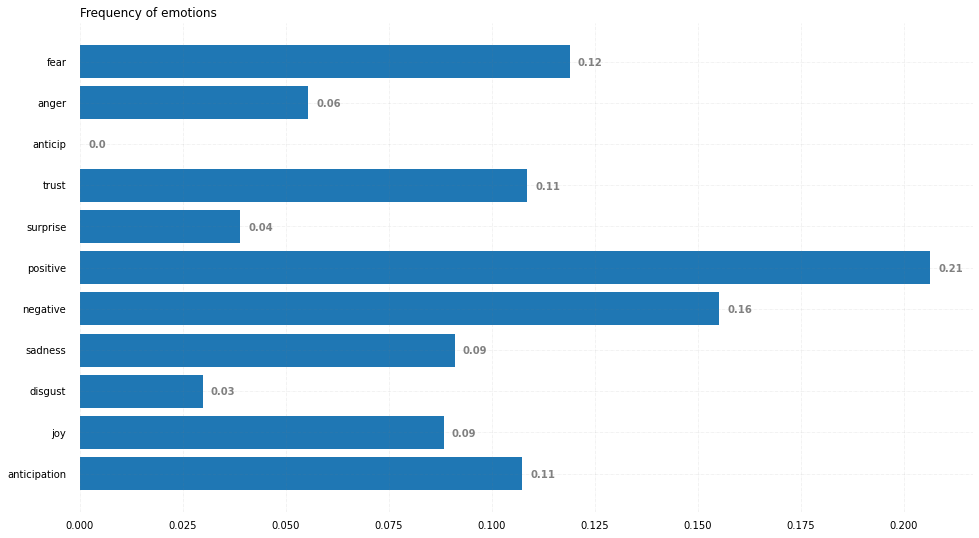

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

names = list(emotion.affect_frequencies.keys())
values = list(emotion.affect_frequencies.values())

# Figure Size
fig,ax = plt.subplots(figsize =(16,9))

# Horizontal Bar Plot
ax.barh(names,values)

# Remove axes splines
for s in ['top','bottom','left','right']:
	ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x,y gridlines
ax.grid(b = True,color ='grey',
		linestyle ='-.',linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.002,i.get_y()+0.5,
			str(round((i.get_width()),2)),
			fontsize = 10,fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Frequency of emotions',
			loc ='left',)

# Show Plot
plt.show()



Raw emotion scores {'anger': 12, 'fear': 36, 'negative': 41, 'sadness': 20, 'positive': 44, 'anticipation': 20, 'joy': 12, 'trust': 21, 'surprise': 6, 'disgust': 2}
Top Emotions [('positive', 0.205607476635514)]
Frequency {'fear': 0.16822429906542055, 'anger': 0.056074766355140186, 'anticip': 0.0, 'trust': 0.09813084112149532, 'surprise': 0.028037383177570093, 'positive': 0.205607476635514, 'negative': 0.19158878504672897, 'sadness': 0.09345794392523364, 'disgust': 0.009345794392523364, 'joy': 0.056074766355140186, 'anticipation': 0.09345794392523364}


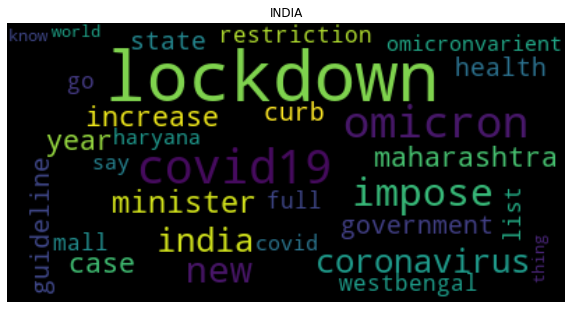

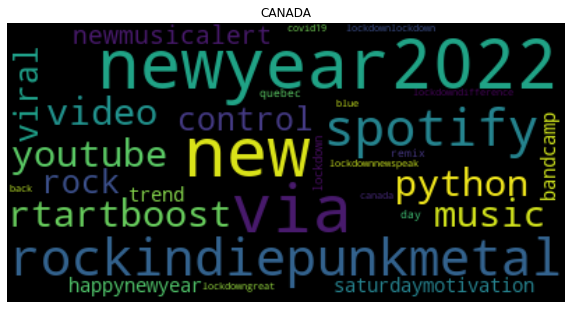

In [ ]:
#Country wise sentiment
#INDIA
india_df = df.loc[df.country=='India']

wc(india_df['msg_lemmatized'],'black','INDIA')
emotionindia=NRCLex(','.join(india_df['msg_lemmatized']))
print('Raw emotion scores',emotionindia.raw_emotion_scores)
print('Top Emotions',emotionindia.top_emotions)
print('Frequency',emotionindia.affect_frequencies)


#CANADA
canada_df=df.loc[df.country=='Canada']

wc(canada_df['msg_lemmatized'],'black','CANADA')